In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#1. 지역별 회사 개수

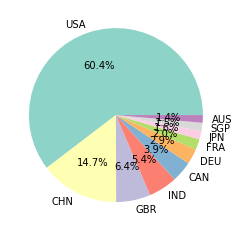

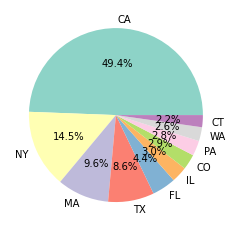

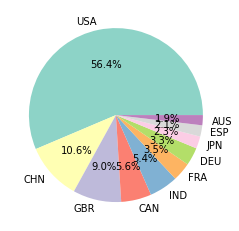

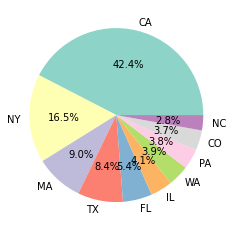

In [ ]:
#funding rounds와 organizations 불러오기
fundround_df=pd.read_csv('./Dataset/crunchbase_1/funding_rounds.csv')
org_df=pd.read_csv('./Dataset/crunchbase_4/organizations.csv')

# org_df에서 'uuid','country_code','state_code'추출 후 열 이름 변경
org=org_df[['uuid','country_code','state_code']]
org=org.rename(columns={'name':'org_name','uuid':'org_uuid'})

#fundround_df에서 'org_uuid','investment_type','raised_amount_usd'추출, org_uuid에 대해 그룹화
fundround=fundround_df[['org_uuid','investment_type','raised_amount_usd']]
fundround=fundround.groupby(by='org_uuid').sum().reset_index()

#fundround와 org 결합, count열 추가
fundorg=pd.merge(fundround,org,how='left',on='org_uuid')
fundorg['count']=1

#fundorg df를 country_code로 그룹화해 나라별 기업 수 구하기, 상위 10개국 추출
country_count=fundorg[['country_code','count']].groupby(by='country_code').sum().reset_index().sort_values(by='count',ascending=False)
country_count_10=country_count.head(10)

#country code==USA인 기업을 state_code로 그룹화해 주별 기업 수 구하기, 상위 10개국 추출
state_count=fundorg[fundorg['country_code']=='USA'][['state_code','count']].groupby(by='state_code').sum().reset_index().sort_values(by='count',ascending=False)
state_count_10=state_count.head(10)

#country code로 그룹화 해 총 투자금 구하기, 상위 10개국 추출
country_total=fundorg[['raised_amount_usd','country_code']].groupby(by='country_code').sum().reset_index().sort_values(by='raised_amount_usd',ascending=False)
country_total10=country_total.head(10)

#country code==USA인 자료 주별로 그룹화 해 총 투자금 구하기, 상위 10개주 추출
state_total=fundorg[fundorg['country_code']=='USA'][['raised_amount_usd','state_code']].groupby(by='state_code').sum().reset_index().sort_values(by='raised_amount_usd',ascending=False)
state_total10=state_total.head(10)

color= sns.color_palette("Set3", 10)
#총 투자금으로 구한 상위 10개국 파이차트
plt.pie(country_total10['raised_amount_usd'], labels=country_total10['country_code'], autopct='%.1f%%',startangle = 0,colors=color)
plt.show()

#총 투자금으로 구한 상위 10개주 파이차트
plt.pie(state_total10['raised_amount_usd'], labels=state_total10['state_code'], autopct='%.1f%%',startangle = 0,colors=color)
plt.show()

#총 기업 수로 구한 상위 10개국 파이차트
color= sns.color_palette("Set3", 10)
plt.pie(country_count_10['count'], labels=country_count_10['country_code'], autopct='%.1f%%',startangle = 0, colors=color)
plt.show()

#총 기업 수로 구한 상위 10개주파이차트
plt.pie(state_count_10['count'], labels=state_count_10['state_code'], autopct='%.1f%%',colors=color)
plt.show()

#2. 지역별 총 투자 금액

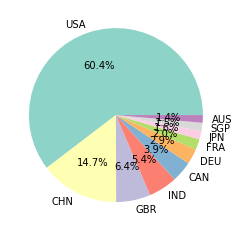

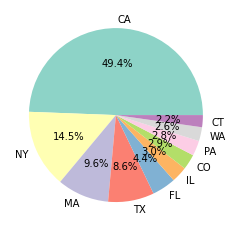

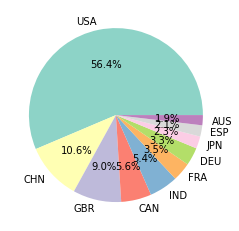

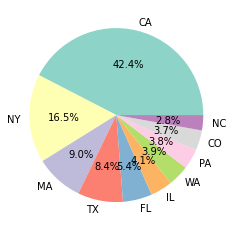

In [ ]:
#funding rounds와 organizations 불러오기
fundround_df=pd.read_csv('./Dataset/crunchbase_1/funding_rounds.csv')
org_df=pd.read_csv('./Dataset/crunchbase_4/organizations.csv')

# org_df에서 'uuid','country_code','state_code'추출 후 열 이름 변경
org=org_df[['uuid','country_code','state_code']]
org=org.rename(columns={'name':'org_name','uuid':'org_uuid'})

#fundround_df에서 'org_uuid','investment_type','raised_amount_usd'추출, org_uuid에 대해 그룹화
fundround=fundround_df[['org_uuid','investment_type','raised_amount_usd']]
fundround=fundround.groupby(by='org_uuid').sum().reset_index()

#fundround와 org 결합, count열 추가
fundorg=pd.merge(fundround,org,how='left',on='org_uuid')
fundorg['count']=1

#fundorg df를 country_code로 그룹화해 나라별 기업 수 구하기, 상위 10개국 추출
country_count=fundorg[['country_code','count']].groupby(by='country_code').sum().reset_index().sort_values(by='count',ascending=False)
country_count_10=country_count.head(10)

#country code==USA인 기업을 state_code로 그룹화해 주별 기업 수 구하기, 상위 10개국 추출
state_count=fundorg[fundorg['country_code']=='USA'][['state_code','count']].groupby(by='state_code').sum().reset_index().sort_values(by='count',ascending=False)
state_count_10=state_count.head(10)

#country code로 그룹화 해 총 투자금 구하기, 상위 10개국 추출
country_total=fundorg[['raised_amount_usd','country_code']].groupby(by='country_code').sum().reset_index().sort_values(by='raised_amount_usd',ascending=False)
country_total10=country_total.head(10)

#country code==USA인 자료 주별로 그룹화 해 총 투자금 구하기, 상위 10개주 추출
state_total=fundorg[fundorg['country_code']=='USA'][['raised_amount_usd','state_code']].groupby(by='state_code').sum().reset_index().sort_values(by='raised_amount_usd',ascending=False)
state_total10=state_total.head(10)

color= sns.color_palette("Set3", 10)
#총 투자금으로 구한 상위 10개국 파이차트
plt.pie(country_total10['raised_amount_usd'], labels=country_total10['country_code'], autopct='%.1f%%',startangle = 0,colors=color)
plt.show()

#총 투자금으로 구한 상위 10개주 파이차트
plt.pie(state_total10['raised_amount_usd'], labels=state_total10['state_code'], autopct='%.1f%%',startangle = 0,colors=color)
plt.show()

#총 기업 수로 구한 상위 10개국 파이차트
color= sns.color_palette("Set3", 10)
plt.pie(country_count_10['count'], labels=country_count_10['country_code'], autopct='%.1f%%',startangle = 0, colors=color)
plt.show()

#총 기업 수로 구한 상위 10개주파이차트
plt.pie(state_count_10['count'], labels=state_count_10['state_code'], autopct='%.1f%%',colors=color)
plt.show()

#3. 투자가 많이 이루어진 top 10 category

##투자가 많이 이루어지는 상위 카테고리 peichart

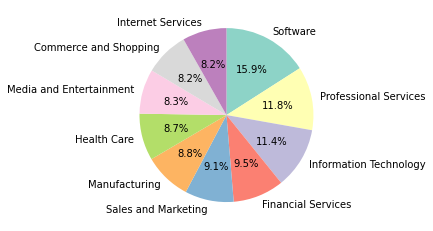

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive


# 데이터 불러오기
organizations=pd.read_csv('./Dataset/crunchbase_4/organizations.csv', index_col=0)

# palette type 지정
sns.set_palette("Set2")

# category에 대한 갯수 확인
org_cat=organizations.copy()
org_cat = org_cat.drop(org_cat[org_cat['category_groups_list'].isnull()].index)
org_cat['category_groups_list'] = org_cat['category_groups_list'].apply(lambda x: x.split(','))
cat_dict={}
for i in range(len(org_cat)):
  cat_list=org_cat['category_groups_list'].iloc[i]
  for cat_ in cat_list:
    if cat_ in cat_dict:
      cat_dict[cat_]+=1
    else:
      cat_dict[cat_]=1

# category dictionary를 category dataframe으로 변경
cat_df = pd.DataFrame.from_dict(cat_dict, orient='index').rename(columns={0:'counts'})

cat_df['category']=cat_df.index
cat_df=cat_df.loc[:,['category','counts']]
cat_df=cat_df.sort_values(by='counts', ascending=False)


# 상위 10개 선별
top_10_cat=cat_df.head(11)
top_10_cat=top_10_cat.drop('Other', axis=0)
top_10_cat


# 전체 값을 더해서 pie chart 그릴 때 비율에 이용
# list를 이용해서 for 문을 이용하여 그리기
sum=top_10_cat['counts'].sum()
top_cat_lst=list(top_10_cat['category'])

# 상위 10개 category (count 기준)에 대한 pie chart

ratio_cat_lst=list(top_10_cat['counts'])/sum
ratio = []
for i in ratio_cat_lst:
  ratio.append(i)

labels = top_cat_lst

colors=sns.set_palette("Set3", len(labels))

plt.pie(ratio, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, counterclock=False)
plt.show()


In [ ]:
# 전체 값을 더해서 pie chart 그릴 때 비율에 이용
# list를 이용해서 for 문을 이용하여 그리기

sum=top_10_cat['counts'].sum()
top_cat_lst=list(top_10_cat['category'])

# 상위 10개 category (count 기준)에 대한 pie chart

ratio_cat_lst=list(top_10_cat['counts'])/sum
ratio = []
for i in ratio_cat_lst:
  ratio.append(i)

labels = top_cat_lst

colors=sns.set_palette("Set3", len(labels))

plt.pie(ratio, labels=labels, colors=colors, autopct='%.1f%%', startangle=90, counterclock=False)
plt.show()

##투자가 많이 이루어지는 상위 카테고리에서의 투자 금액 piechart

In [ ]:
# funding_rounds 불러오기
funding_rounds=pd.read_csv('/Dataset/crunchbase_1/funding_rounds.csv',index_col=0)

# 'raised_amount_usd' 칼럼에 대해서만 Na값 0으로 처리
funding_rounds['raised_amount_usd'] = funding_rounds['raised_amount_usd'].fillna(0)

# 전처리 결과물을 담을 df 생성
org = pd.DataFrame({'org_uuid': funding_rounds['org_uuid'].unique()})

# Debt Financing, Convertible Note를 통해 투자받은 기록만 확인
lst1=[]
for i in funding_rounds['name']:
    lst1.append('Debt Financing' in i)

lst2=[]
for i in funding_rounds['name']:
    lst2.append('Convertible Note' in i)

debt_firms = funding_rounds[lst1 or lst2]

# debt_firms에 대해서 org_uuids에 대해 groupby해서 summation 구하기.
org_financing =  debt_firms[['org_uuid','raised_amount_usd']].groupby('org_uuid').sum().rename(columns = {'raised_amount_usd':'financing'})

# financing 행 org에 병합
org = pd.merge(org, org_financing, how = 'left', on = 'org_uuid').set_index('org_uuid').fillna(0)

# aver_money
aver_money = funding_rounds.groupby('org_uuid').mean()['raised_amount_usd']

# aver_money행 org에 병합
org = pd.merge(org, aver_money, how = 'left', on = 'org_uuid').fillna(0).rename(columns = {"raised_amount_usd":'aver_money'})

total = funding_rounds.groupby('org_uuid').sum()['raised_amount_usd']
org = pd.merge(org, total, how = 'left', on = 'org_uuid').fillna(0)

# ipo, acquisition, success 여부
ipo_acquisitions = pd.read_csv('/Dataset/by_success.csv',index_col=0).rename(columns = {"uuid":'org_uuid'}).set_index('org_uuid')
org = pd.merge(org,ipo_acquisitions, how='left',on='org_uuid')
org['success'] = org['is_acquisitions'] + org['is_ipos']
org['success'] = org['success'].astype(bool)
org = org[['financing','raised_amount_usd','aver_money','success']]

# organizations의 status 칼럼 추가가
organizations = pd.read_csv('/Dataset/crunchbase_4/organizations.csv').rename(columns = {'uuid':'org_uuid'})
org = pd.merge(org, organizations[['org_uuid','status']], how = 'left', on = 'org_uuid')

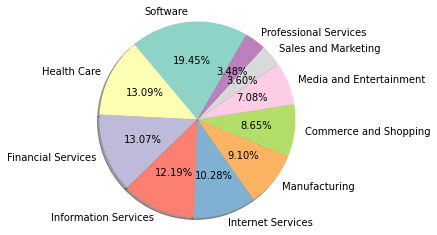

In [ ]:
# organizations에 있는 카테고리 그룹을 funding_rounds에 병합해 줄 것임
org_cat = organizations.drop(organizations[organizations['category_groups_list'].isnull()].index)
org_cat['category_groups_list'] = org_cat['category_groups_list'].apply(lambda x: x.split(','))

funding_rounds = pd.merge(funding_rounds, org_cat[['org_uuid', 'category_groups_list']],how='left',on='org_uuid')

# 상위 10개 카테고리에 대해 카테고리 별 총합 계산 및 시각화
fr_category = funding_rounds[['raised_amount_usd','category_groups_list']].dropna()

software_sum = 0

for i in range(506543):
  try:
    if "Software" in fr_category.iloc[i, 1]:
      software_sum += fr_category.iloc[i, 0]
  except:
    pass

ps_sum = 0

for i in range(506543):
  try:
    if "Professional Services" in fr_category.iloc[i, 1]:
      ps_sum += fr_category.iloc[i, 0]
  except:
    pass

it_sum = 0

for i in range(506543):
  try:
    if "Information Technology" in fr_category.iloc[i, 1]:
      it_sum += fr_category.iloc[i, 0]
  except:
    pass

fs_sum = 0

for i in range(506543):
  try:
    if "Financial Services" in fr_category.iloc[i, 1]:
      fs_sum += fr_category.iloc[i, 0]
  except:
    pass

sam_sum = 0

for i in range(506543):
  try:
    if "Sales and Marketing" in fr_category.iloc[i, 1]:
      sam_sum += fr_category.iloc[i, 0]
  except:
    pass

manuf_sum = 0

for i in range(506543):
  try:
    if "Manufacturing" in fr_category.iloc[i, 1]:
      manuf_sum += fr_category.iloc[i, 0]
  except:
    pass

hc_sum = 0

for i in range(506543):
  try:
    if "Health Care" in fr_category.iloc[i, 1]:
      hc_sum += fr_category.iloc[i, 0]
  except:
    pass

mae_sum = 0

for i in range(506543):
  try:
    if "Media and Entertainment" in fr_category.iloc[i, 1]:
      mae_sum += fr_category.iloc[i, 0]
  except:
    pass

cas_sum = 0

for i in range(506543):
  try:
    if "Commerce and Shopping" in fr_category.iloc[i, 1]:
      cas_sum += fr_category.iloc[i, 0]
  except:
    pass

is_sum = 0

for i in range(506543):
  try:
    if "Internet Services" in fr_category.iloc[i, 1]:
      is_sum += fr_category.iloc[i, 0]
  except:
    pass

category_sum = [software_sum, ps_sum, it_sum, fs_sum,sam_sum, manuf_sum, hc_sum, mae_sum, cas_sum, is_sum]

summation = pd.DataFrame({'Category':['Software', 'Professional Services','Information Services','Financial Services','Sales and Marketing','Manufacturing','Health Care','Media and Entertainment','Commerce and Shopping','Internet Services'], 'sum':category_sum}).sort_values(by='sum', ascending = False)

color= sns.set_palette("Set3", len(summation))
plt.pie(summation['sum'], labels = summation['Category'],autopct = '%1.2f%%',shadow = True, startangle = 60, textprops = {'fontsize':10}, colors =color)
plt.axis('equal')
plt.show()

#4. Funding Round 별 투자 정보

##Funding Round 별 투자 평균 금액

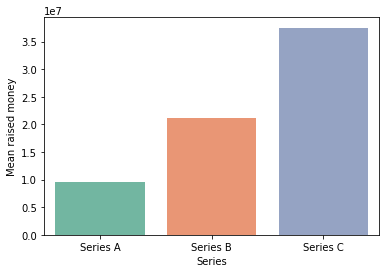

In [ ]:
# funding_rounds 불러오기
funding_rounds=pd.read_csv('/content/drive/MyDrive/DSL/EDA_Project/crunchbase_1/funding_rounds.csv',index_col=0)

# 'raised_amount_usd' 칼럼에 대해서만 Na값 0으로 처리
funding_rounds['raised_amount_usd'] = funding_rounds['raised_amount_usd'].fillna(0)

# 전처리 결과물을 담을 df 생성
org = pd.DataFrame({'org_uuid': funding_rounds['org_uuid'].unique()})

# Debt Financing, Convertible Note를 통해 투자받은 기록만 확인
lst1=[]
for i in funding_rounds['name']:
    lst1.append('Debt Financing' in i)

lst2=[]
for i in funding_rounds['name']:
    lst2.append('Convertible Note' in i)

debt_firms = funding_rounds[lst1 or lst2]

# debt_firms에 대해서 org_uuids에 대해 groupby해서 summation 구하기.
org_financing =  debt_firms[['org_uuid','raised_amount_usd']].groupby('org_uuid').sum().rename(columns = {'raised_amount_usd':'financing'})

# financing 행 org에 병합
org = pd.merge(org, org_financing, how = 'left', on = 'org_uuid').set_index('org_uuid').fillna(0)

# aver_money
aver_money = funding_rounds.groupby('org_uuid').mean()['raised_amount_usd']

# aver_money행 org에 병합
org = pd.merge(org, aver_money, how = 'left', on = 'org_uuid').fillna(0).rename(columns = {"raised_amount_usd":'aver_money'})

total = funding_rounds.groupby('org_uuid').sum()['raised_amount_usd']
org = pd.merge(org, total, how = 'left', on = 'org_uuid').fillna(0)

# ipo, acquisition, success 여부
ipo_acquisitions = pd.read_csv('/content/drive/MyDrive/DSL/EDA_Project/by_success.csv',index_col=0).rename(columns = {"uuid":'org_uuid'}).set_index('org_uuid')
org = pd.merge(org,ipo_acquisitions, how='left',on='org_uuid')
org['success'] = org['is_acquisitions'] + org['is_ipos']
org['success'] = org['success'].astype(bool)
org = org[['financing','raised_amount_usd','aver_money','success']]

# organizations의 status 칼럼 추가가
organizations = pd.read_csv('/content/drive/MyDrive/DSL/EDA_Project/crunchbase_4/organizations.csv').rename(columns = {'uuid':'org_uuid'})
org = pd.merge(org, organizations[['org_uuid','status']], how = 'left', on = 'org_uuid')

org

series_a = []
for i in funding_rounds['name']:
  series_a.append('Series A' in i)

series_b = []
for i in funding_rounds['name']:
  series_b.append('Series B' in i)

series_c = []
for i in funding_rounds['name']:
  series_c.append('Series C' in i)

a_sum = funding_rounds[series_a]['raised_amount_usd'].mean()
b_sum = funding_rounds[series_b]['raised_amount_usd'].mean()
c_sum = funding_rounds[series_c]['raised_amount_usd'].mean()

data = pd.DataFrame({'Series':['Series A','Series B','Series C'], 'Mean raised money':[a_sum,b_sum,c_sum]})
sns.set_palette("Set2")
sns.barplot(data = data, x='Series',y='Mean raised money')
plt.show()

##Funding Round 별 기업과 개인 투자자의 *수*

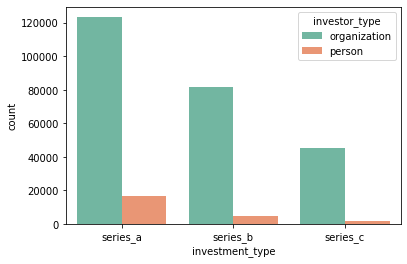

In [ ]:

funding_rounds=pd.read_csv("./Dataset/crunchbase_1/funding_rounds.csv", index_col=0)
investments=pd.read_csv("./Dataset/crunchbase_2/investments.csv", index_col=0)
df_1=pd.merge(investments, funding_rounds, how='left', left_on='funding_round_uuid', right_on='uuid')
df_2=df_1.loc[:,['name_x', 'investment_type', 'funding_round_uuid','funding_round_name',
                 'investor_uuid','org_uuid','investor_name','investor_type',
                 'raised_amount_usd','post_money_valuation_usd',
                 'investor_count']]
df_2=df_2.rename(columns={'name_x':'name'})
sns.countplot(data = df_2, x = 'investment_type', hue = 'investor_type', order=['series_a','series_b','series_c'])
sns.set_palette("Set2")
plt.show()